# Amazon Product Co-purchasing Network

In \[1\]:

    from IPython.display import display, Image
    image_path = "amazon.png"
    display(Image(filename=image_path, width=800))

<img src="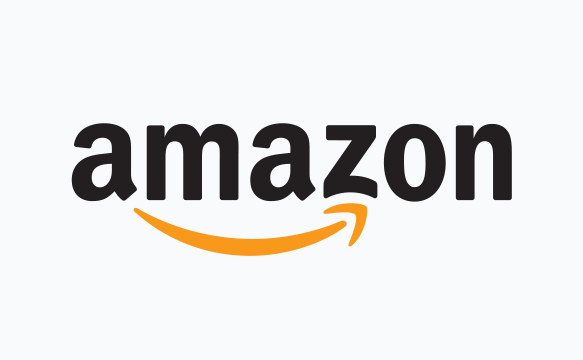%0A" width="800" />

# Introduction<a href="#Introduction" class="anchor-link">¶</a>

The dataset is an Amazon product co-purchasing network. It represents
the co-purchasing relationships between products on Amazon, where each
product is represented as a node in the network. The edges between nodes
indicate that the corresponding products were frequently purchased
together by Amazon customers.

Importing necessary libraries for the further process of the network

In \[2\]:

    import csv
    import gzip
    import pandas as pd
    import networkx as nx
    import matplotlib.pyplot as plt
    import numpy as np

The code in the section below reads a text file that has been compressed
(amazon0505.txt.gz) and writes the contents to a CSV file
(amazon0505.csv). The input file is processed line by line. If a line
has two values separated by whitespace, the values is stored in separate
columns in the CSV file; otherwise, the entire line is saved as one
value in the CSV file.

In \[3\]:

    input_file = 'amazon0505.txt.gz'
    output_file = 'amazon0505.csv'

    with gzip.open(input_file, 'rt') as gzfile, open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for line in gzfile:
            line = line.strip()
            values = line.split()
            if len(values) != 2:
                writer.writerow([line])  # Write the entire line as a single entry in the CSV file
            else:
                writer.writerow(values)

The below code will open the file i.e 'amazon0505.csv' to read it starts
by assigning a variable to the file. The with statement ensures that the
file is properly closed after it is used. Followed by another variable
'line_counter' which will be use to keep track of the number of lines
that meet the condition specified in the loop. Next line will enumerate
and the loop iterates over each line in the file. The enumerate function
is used to get both the line number (line_number) and the line content
(line). The parameter is used to start the line numbering from 1 instead
of the default 0. The next condition will check if the length of the
line, after removing leading/trailing spaces and splitting it by commas,
is not equal to 1. This condition is used to identify lines that contain
more than one value (separated by commas) and if the condition in the
previous step is True, this line prints the line number and the content
of the line. The next line increments the line_counter variable by 1
whenever a line meets the condition in step 4. Next the if function will
check the condition if line_counter is equal to 10. If it is, the loop
is terminated using the break statement, preventing further iteration
over the file.

In \[4\]:

    with open('amazon0505.csv', 'r') as file:
        line_counter = 0
        for line_number, line in enumerate(file, start=1):
            if len(line.strip().split(',')) != 1:
                print(f"Line {line_number}: {line}")
                line_counter += 1
            if line_counter == 10:
                break

    Line 5: 0,1

    Line 6: 0,2

    Line 7: 0,3

    Line 8: 0,4

    Line 9: 0,5

    Line 10: 0,6

    Line 11: 0,7

    Line 12: 0,8

    Line 13: 0,9

    Line 14: 0,10

### Create a Network<a href="#Create-a-Network" class="anchor-link">¶</a>

Using the pairs of values from the dataset, we will construct a network
by representing each value as a node and the pairs as directed edges
between nodes.

Commencing the code by importing the necessary libraries for to create a
network that is 'networkx' as 'nx which will provide functionality for
creating and manipulating graphs and 'matplotlib.pyplot' as 'plt' which
will be used for visualizing the graph later on. Then to creating an
Empty Directed Graph the code initializes an empty directed graph using
G = nx.DiGraph(). The graph is stored in the variable G. Then we will
read the file in .csv format, it then iterates over each line in the
file using a for loop. Then the code checks if the line starts with a \#
character using line.startswith('#'). This is a common way to indicate
comment lines in many file formats. If a line starts with #, it is
skipped and the loop moves to the next line, if the line is not a
comment line, it proceeds to the next step. Then to extracting source
and target nodes, the code uses the map() function to split the line
into two values based on the comma , delimiter: line.strip().split(',').
The resulting values are converted to integers using int(). The source
node and target node values are assigned to the variables source_node
and target_node, respectively and finally to add an edge to the graph,
the add_edge() function connects the source node to the target node in a
directed manner, indicating the direction of the relationship.

After executing this code, the directed graph G will contain all the
edges specified in the CSV file, then graph can be visualized or further
manipulated using NetworkX or other libraries.

In \[5\]:

    G = nx.DiGraph()
    with open('amazon0505.csv', 'r') as file:
        for line in file:
            if line.startswith('#'):  # Skip comment lines
                continue
            source_node, target_node = map(int, line.strip().split(','))
            G.add_edge(source_node, target_node)

### Degree Distribution and Network Analysis<a href="#Degree-Distribution-and-Network-Analysis" class="anchor-link">¶</a>

The below code will perform a network analysis on the directed graph G
created in the previous code block. It analyzes the degree distribution
of the nodes in the graph, the degree of a node in a directed graph
represents the number of edges incident to that node.

The code starts with creating a list comprehension degree_sequence that
iterates over the degrees of all nodes in the graph using G.degree().
Next the function will find the unique degrees in the degree_sequence
list and their corresponding frequencies. Next, the code uses
plt.scatter() function from the matplotlib library to plot a scatter
plot graph of the degree distribution. Then we will set the x and y
scales followed by x, y and title labels respectively and finally we
will show the graph.

The output shows that the degree distribution plot shows that the
majority of nodes in the co-purchasing network have a degree of 0,
indicating they have no connections or purchases with other products.
The y-axis value of 10^4 (400000) suggests that there are a large number
of nodes with a degree of 0. The implications of having a large number
of nodes with no connections (degree 0) in the co-purchasing network
this indicate potential opportunities for targeted marketing or product
recommendations to increase connections among these nodes.

In \[6\]:

    degree_sequence = [degree for node, degree in G.degree()]

    bins, frequencies = np.unique(degree_sequence, return_counts=True)

    plt.scatter(bins, frequencies, marker='o', s=10)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()

![](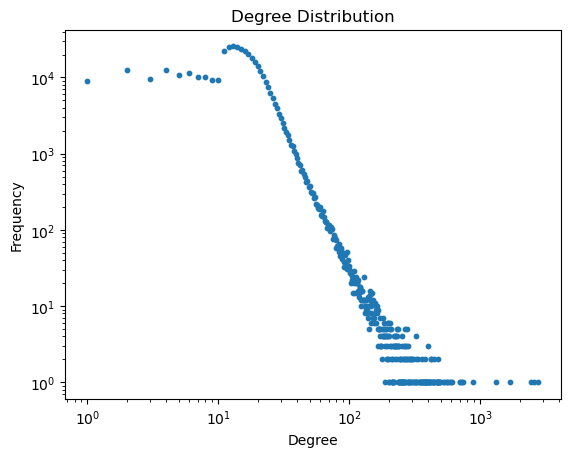%0A)

### Connected Components Analysis<a href="#Connected-Components-Analysis" class="anchor-link">¶</a>

Now we will check for the largest weakly connected component in the
graph and prints the number of nodes and edges in that component. The
code uses the nx.weakly_connected_components() function from the
NetworkX library to find all weakly connected components in the graph. A
weakly connected component is a subgraph in which there is a directed
path between any pair of nodes, ignoring the direction of the edges.
Then using the max() function is then used to find the largest weakly
connected component among all the weakly connected components. Then the
key=len argument specifies that the component with the maximum length
(number of nodes) should be considered the largest. Using the len()
function to determine the number of nodes in the largest weakly
connected component and prints it using print. Next, the code uses the
G.subgraph(largest_component) function to create a subgraph containing
only the nodes from the largest weakly connected component. The
number_of_edges() function is then called on the subgraph to calculate
the number of edges in it. Finally, the code prints the number of edges.

The output displays the largest weakly connected component in the
network contains '410,236' nodes and the number of edges within this
component is '3,356,824', indicating a significant amount of
interconnectedness. The significance of the largest weakly connected
component, which represents a substantial portion of the network. This
could indicate the existence of particular product categories or
clusters and strong interdependencies among the products in this
component.

In \[7\]:

    largest_component = max(nx.weakly_connected_components(G), key=len)
    print(f"Number of nodes in largest weakly connected component: {len(largest_component)}")
    print(f"Number of edges in largest weakly connected component: {G.subgraph(largest_component).number_of_edges()}")

    Number of nodes in largest weakly connected component: 410236
    Number of edges in largest weakly connected component: 3356824

### Path Analysis<a href="#Path-Analysis" class="anchor-link">¶</a>

Now lets see the path analysis to find the shortest path between a
source node and a target node using the networkx library. The below code
starts by assigning the value 0 to the variable 'source_node', which
represents the source node from which the shortest path is calculated.
Then the code assigns the value 10 to the variable 'target_node', which
represents the target node to which the shortest path leads. Next, the
code uses the nx.shortest_path() function to find the shortest path
between the source node and the target node in the graph G. The function
takes three arguments: the graph G, the source node, and the target
node. The shortest_path variable is assigned the resulting shortest path
then finally we will print using f string.

The output shows that the shortest path between node 0 and node 10 is
0,10 indicating a direct connection between these two nodes. The
relevance in the context of the co-purchasing network may shed light on
the reachability or accessibility of particular products within the
network, as well as the ways in which it may have an effect on customer
behavior or purchasing decisions.

In \[8\]:

    source_node = 0
    target_node = 10
    shortest_path = nx.shortest_path(G, source=source_node, target=target_node)
    print(f"Shortest path from {source_node} to {target_node}: {shortest_path}")

    Shortest path from 0 to 10: [0, 10]

### Clustering Coefficient and Density Analysis<a href="#Clustering-Coefficient-and-Density-Analysis" class="anchor-link">¶</a>

Now we will calculate the average clustering coefficient and density of
the network using functions from the NetworkX library. Begining the code
by using the nx.average_clustering() function from the NetworkX library
to calculate the average clustering coefficient of the graph G. The
average_clustering() function takes a graph as input and returns the
average clustering coefficient, which measures the extent to which nodes
in a graph tend to cluster together. It then calculate average
clustering coefficient which is assigned to the variable
'clustering_coefficient'. Next it uses the nx.density() function from
the NetworkX library to calculate the density of the graph G. The
density() function takes a graph as input and returns the density, which
represents the ratio of actual edges present in the graph to the total
number of possible edges. The calculated density is assigned to the
variable density. Last we will use print() to display the average
clustering coefficient and density of the network.

The output shows that the average clustering coefficient of the network
is 0.354, suggesting a relatively high level of clustering or local
interconnectedness. The density of the network is approximately
1.99e-05, indicating that the network is relatively sparse.

In \[9\]:

    clustering_coefficient = nx.average_clustering(G)
    density = nx.density(G)
    print(f"Average clustering coefficient: {clustering_coefficient}")
    print(f"Density of the network: {density}")

    Average clustering coefficient: 0.3543680740821862
    Density of the network: 1.9946288316728177e-05

### Centrality Analysis<a href="#Centrality-Analysis" class="anchor-link">¶</a>

The below code calculates the degree centrality for each node in the
graph and identifies the top 10 nodes with the highest degree
centrality.

The code starts by using the nx.degree_centrality() function from the
NetworkX library to calculate the degree centrality for each node in the
graph G. The degree_centrality() function takes a graph as input and
returns a dictionary where the keys are the nodes and the values are
their corresponding degree centrality measures. Then the degree
centrality of a node is defined as the number of edges connected to the
node divided by the maximum possible edges in the graph. It then
calculate the degree centrality measures which are stored in the
'degree_centrality' dictionary. Followed by using the sorted() function
to sort the items in the 'degree_centrality' dictionary based on their
degree centrality values. We will sort it in descending order i.e. from
highest to lowest degree centrality. The sorted items are stored in the
'sorted_degree_centrality' list. Then using the for loop to iterate over
the first 10 items in the sorted_degree_centrality list and using
print() to display a header for the top 10 nodes with highest degree
centrality.

The output displays the Top 10 nodes with highest degree centrality are
listed, along with their respective centrality values. 'Node 593' has
the highest degree centrality, followed by nodes 977 and 89. These nodes
have a higher likelihood of influencing the flow of information or
purchases in the co-purchasing network due to their high degree (number
of connections). Nodes with high degree centrality could represent
popular or frequently purchased products that have a strong influence on
the purchasing decisions of other customers.

In \[10\]:

    degree_centrality = nx.degree_centrality(G)
    sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f"Top 10 nodes with highest degree centrality:\n")
    for node, centrality in sorted_degree_centrality[:10]:
        print(f"Node: {node}, Degree Centrality: {centrality}")

    Top 10 nodes with highest degree centrality:

    Node: 593, Degree Centrality: 0.00675222738186649
    Node: 977, Degree Centrality: 0.006315892110619522
    Node: 89, Degree Centrality: 0.006001438200056065
    Node: 2612, Degree Centrality: 0.0040879008373249474
    Node: 10999, Degree Centrality: 0.0031957292771216494
    Node: 41037, Degree Centrality: 0.0021670505929528194
    Node: 104, Degree Centrality: 0.0018184699013979791
    Node: 12642, Degree Centrality: 0.0017575292210562238
    Node: 582, Degree Centrality: 0.0017234024400648407
    Node: 634, Degree Centrality: 0.0017185271856375002

### Comparison with ER, BA, WS Graphs<a href="#Comparison-with-ER,-BA,-WS-Graphs" class="anchor-link">¶</a>

Now the random graphs will be created and compared to the original graph
G in terms of the number of nodes and edges, the graphs are Erdos-Renyi
(ER), Barabasi-Albert (BA), and Watts-Strogatz (WS) graphs. The code
starts obtaining the Number of Nodes of G. We will use
G.number_of_nodes() to get the total number of nodes in the graph G, and
assigns it to the variable n. The code uses assigns variables as
er_nodes, ba_nodes and ws_nodes respectively to get the total number of
edges in the graph G, and assigns them respectively. Then we will
reducing the number of Nodes to ensure faster execution and avoid
creating very large random graphs, the code reduces the number of nodes
for the comparison. Then in the following code we will adjust the
probability values and setting the length and seed respectively and then
create the Erdos-Renyi (ER), Barabasi-Albert (BA) and Watts-Strogatz
(WS) graphs respectively and finally we will all three graphs with their
number of nodes and edges respectively.

In the ER, BA and WS graph, we got the same nodes in comparison. These
findings imply that the dataset's structure, in terms of the number of
nodes, is more like to the ER, BA, and WS graphs. But in this
comparison, the general structure or particular characteristics of the
networks have not been taken into account; just the number of nodes
considered.

In \[11\]:

    import random
    import matplotlib.pyplot as plt

    n = 410236

    # Select 20% of the nodes for comparison
    subset_size = int(n * 0.2)  # Calculate the subset size
    subset_nodes = random.sample(list(G.nodes()), subset_size)

    # Define parameters for ER, BA, and WS graphs
    p = 0.01  # Probability for ER graph
    m = 2  # Number of edges per node for BA graph
    k = 10  # Number of nearest neighbors for WS graph
    rewiring_prob = 0.05  # Probability of rewiring for WS graph

    # Generate ER, BA, and WS graphs using the subset of nodes
    er_graph = nx.erdos_renyi_graph(subset_size, p)
    ba_graph = nx.barabasi_albert_graph(subset_size, m)
    ws_graph = nx.watts_strogatz_graph(subset_size, k, p)

    # Print the number of nodes in each graph
    print("\nComparison with ER Graph:")
    print("Number of nodes:", er_graph.number_of_nodes())

    print("\nComparison with BA Graph:")
    print("Number of nodes:", ba_graph.number_of_nodes())

    print("\nComparison with WS Graph:")
    print("Number of nodes:", ws_graph.number_of_nodes())

    Comparison with ER Graph:
    Number of nodes: 82047

    Comparison with BA Graph:
    Number of nodes: 82047

    Comparison with WS Graph:
    Number of nodes: 82047

### Network Visualization<a href="#Network-Visualization" class="anchor-link">¶</a>

Now we will visulise the network. For this we will start by selecting
the nodes for the subset, the code uses list(G.nodes()) to select the
first 1000 nodes of the graph G, these nodes are stored in the
subgraph_nodes list. Then to create the subgraph, the code uses
G.subgraph(subgraph_nodes) to create a subgraph from the selected nodes.
The subgraph variable stores this subgraph for visualization. Then for
the positioning the nodes we will use nx.spring_layout(subgraph) to
compute the node positions using a spring layout algorithm and also we
will set a seed for reproducibility and by keeping the node size as 100.
Next we will draw the nodes, edges and labels respectively followed by
styling them. The resulting positions are stored in the 'pos' variable.
Next, we will draw and visualise the subgraph. The subgraph parameter
specifies the subgraph to be drawn. The pos parameter specifies the
positions of the nodes. Finally we will add the labels and title and
display it.

The output displays that the network has a high density of edges,
meaning that nodes are highly interconnected, it can lead to overlapping
of nodes in the visualization. When there are too many edges between
nodes,

In \[12\]:

    import matplotlib.pyplot as plt

    # Visualize the Network
    subgraph_nodes = list(G.nodes())[:1000]  # Select the first 1000 nodes as a subset
    subgraph = G.subgraph(subgraph_nodes)  # Create a subgraph with the selected nodes

    # Customize the layout and node positions
    pos = nx.spring_layout(subgraph, seed=42)  # Set a seed for reproducibility
    node_size = 100  # Adjust the node size for better visibility

    # Customize node and edge colors
    node_color = 'skyblue'
    edge_color = 'lightgray'

    # Draw the network graph
    plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
    nx.draw_networkx(
        subgraph,
        pos=pos,
        with_labels=True,
        node_size=node_size,
        node_color=node_color,
        edge_color=edge_color,
        alpha=0.7,
        linewidths=0.5,
    )

    plt.title('Co-Purchasing Network (Subset)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

![](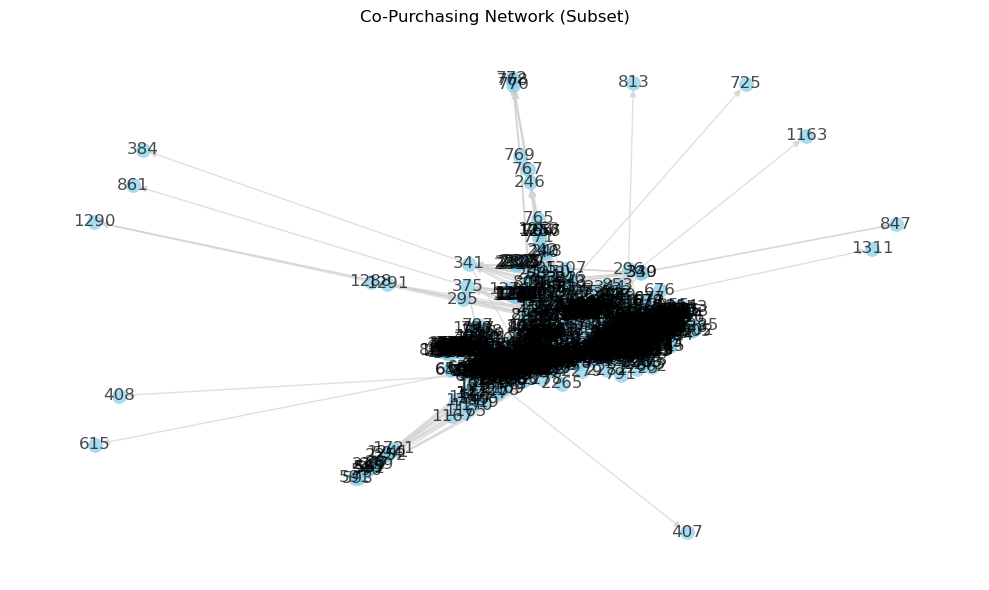%0A)

In \[13\]:

    len(G.edges())# checking the length of the graph 'G' edges
    len(G.nodes())

Out\[13\]:

    410236

### Community Detection using Louvain Algorithm<a href="#Community-Detection-using-Louvain-Algorithm" class="anchor-link">¶</a>

The below code starts by importing the community module, this includes
tools and methods for detecting communities in graphs. The next line
creates an undirected variant of a directed graph G, turning it into an
undirected graph. Undirected graphs lack directed edges in favor of
symmetric relationships at the edges of the graph. The Louvain
algorithm, a well-liked community detection algorithm, is then used to
analyze the undirected graph G_undirected. The Louvain algorithm
optimizes a quality function to locate communities inside the graph. The
outcome, which is a dictionary mapping each node to its associated
community, is kept in the partition variable. Next, in order to
determine how many communities have been found, we must first extract
the values from the partition dictionary, turn them into a set to
eliminate duplicates, and then determine how long the set is. You may
then see how many distinct communities were located in the graph. Then
we will print the number of communities.

In the output we get 172 number of communities detected. The output
shows that the network of nodes inside the graph has a modular or
community structure, with nodes forming strong groupings. A selection of
nodes that are more closely related to one another than to nodes in
other communities make up each community. Understanding the organization
and relationships inside the network can be aided by identifying the
communities. It can be used to locate nodes that have similar traits,
interests, or patterns of communication.

In \[14\]:

    import community

    # Convert the directed graph to an undirected graph
    G_undirected = G.to_undirected()

    # Perform community detection using the Louvain algorithm
    partition = community.best_partition(G_undirected)

    num_communities = len(set(partition.values()))
    print(f"Number of communities detected: {num_communities}")

    Number of communities detected: 165

### Influence Propagation (using NetworkX's diffusion module)<a href="#Influence-Propagation-(using-NetworkX&#39;s-diffusion-module)" class="anchor-link">¶</a>

The code below simulates influence propagation in a networkx-represented
graph using the Independent Cascade model. The code starts by importing
random to generate random numbers then we will define a function as
'independent_cascade' which will take three parameters: G (the graph),
influence_nodes (a list of initial seed nodes), and spread_prob (the
probability of a node adopting influence from its neighbors). Then we
will initialize the set as 'influenced_nodes = set(influence_nodes)'with
the initial seed nodes. It represents the nodes that have been
influenced and 'activated_nodes = set(influence_nodes)' which will
initialize a set 'activated_nodes' with the initial seed nodes which
will represent the nodes that have been activated and are propagating
influence. The next line begins a while loop that keeps going until
there are no more nodes that are impacted. In order to record nodes that
are freshly influenced during the current iteration, the next line
initializes an empty set called 'newly_influenced_nodes'. Then next a
for loop in a while loop will iterate over the neighbors of the current
node in the graph G. Next the if loop line checks if the neighbor node
has not been activated already. Next line generates a random number
between 0 and 1 and checks if it is less than or equal to the
spread_prob (the probability of influence spreading). If the condition
is satisfied, the neighbor node gets influenced. In conclusion, this
program simulates the Independent Cascade model of influence
transmission in a graph. It begins with a set of starting seed nodes and
spreads influence to those nodes' neighbors iteratively according to a
specified spread probability. The final set of influenced nodes is
printed after the simulation has run out of nodes that can be
influenced.

The output will be a list of the nodes which will change each time it is
run as it is randomly generated that were effected during the
Independent Cascade model-based network propagation simulation. Based on
the specified spread probability and number of iterations, and this
indicating that in the hypothetical situation, they were impacted by
their neighbors.

In \[15\]:

    import random

    def independent_cascade(G, influence_nodes, spread_prob):
        influenced_nodes = set(influence_nodes)
        activated_nodes = set(influence_nodes)
        while influenced_nodes:
            newly_influenced_nodes = set()
            for node in influenced_nodes:
                if node in G:
                    for neighbor in G.neighbors(node):
                        if neighbor not in activated_nodes:
                            # Simulate influence propagation with spread probability
                            if random.random() <= spread_prob:
                                newly_influenced_nodes.add(neighbor)
            influenced_nodes = newly_influenced_nodes
            activated_nodes.update(newly_influenced_nodes)
        return activated_nodes

    # Perform influence propagation simulation (Independent Cascade model)
    spread_prob = 0.1  # Probability of a node adopting the influence from its neighbors
    influence_nodes = [0]  # Set the initial seed of influenced nodes

    result = independent_cascade(G, influence_nodes, spread_prob)

    print("Influenced Nodes:", result)

    Influenced Nodes: {0, 4, 53, 7, 618}

### Robustness Analysis<a href="#Robustness-Analysis" class="anchor-link">¶</a>

The code below computes and analyzes the dimensions of the largest
linked components in a graph both before and after node removal. The
code commences by importing approximation from the networkx.algorithms
as it is used to perform targeted node removal based on degree
centrality. Then we will calculate the size of the largest connected
component by initializing a variable 'largest_component_size' then using
the 'weakly_connected_components' function we will find the connected
components, and then the 'max' function and the 'len' will find the
component with the maximum number of nodes and determine the size of
this component respectively. The graph G's next line determines how many
nodes need to be deleted. By multiplying the total nodes by 0.2 and
making an integer out of the result, 20% of the total nodes are
eliminated. Then it basically deletes those nodes and all of the edges
that connect them from the graph. According to their degree of
centrality, the following line chooses a selection of nodes for the
target removal. The sorted list of nodes and their degree centrality
values are used to select the first 'num_nodes_to_remove' nodes and the
targeted_nodes list contains these nodes. Next, it removes these nodes
and their associated edges from the graph. After removing the targeted
node, we will determine the size of the largest connected component in
the updated graph 'G_removed_targeted_nodes'. 'Len' and 'max', and the
'weakly_connected_components' function are used to locate the connected
components, and then it will find the component with the most nodes, and
calculate the size of this component by finally printing it.

The output shows: (1) - There are 410,236 nodes in the original
network's major connected component. (2) - The largest connected
component's size was reduced to 322,638 after several nodes were
removed. (3) - Targeted node elimination significantly decreased the
size of the largest connected component, bringing it down to 315,577
bytes.

These findings suggest that node removal had an effect on the network's
connection and integrity. The variations in the largest connected
component's size reveal the network's robustness and fragility,
emphasizing the significance of certain nodes in preserving the
network's overall connectedness.

In \[16\]:

    from networkx.algorithms import approximation

    # Convert the graph to a directed graph
    G_directed = nx.DiGraph(G)

    # Calculate the size of the largest connected component
    largest_component_size = len(max(nx.weakly_connected_components(G_directed), key=len))
    print(f"Size of largest connected component: {largest_component_size}")

    # Remove a random set of nodes from the network
    num_nodes_to_remove = int(0.2 * G.number_of_nodes())  # Remove 20% of the nodes
    random_nodes = list(G.nodes())
    random.shuffle(random_nodes)
    nodes_to_remove = random_nodes[:num_nodes_to_remove]
    G_removed_nodes = G.copy()
    G_removed_nodes.remove_nodes_from(nodes_to_remove)

    # Calculate the size of the largest connected component after node removal
    largest_component_size_removed = len(max(nx.weakly_connected_components(G_removed_nodes), key=len))
    print(f"Size of largest connected component after node removal: {largest_component_size_removed}")

    # Perform targeted node removal based on degree centrality
    degree_centrality = nx.degree_centrality(G)
    sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    targeted_nodes = [node for node, centrality in sorted_degree_centrality[:num_nodes_to_remove]]
    G_removed_targeted_nodes = G.copy()
    G_removed_targeted_nodes.remove_nodes_from(targeted_nodes)

    # Calculate the size of the largest connected component after targeted node removal
    largest_component_size_removed_targeted = len(max(nx.weakly_connected_components(G_removed_targeted_nodes), key=len))
    print(f"Size of largest connected component after targeted node removal: {largest_component_size_removed_targeted}")

    Size of largest connected component: 410236
    Size of largest connected component after node removal: 322691
    Size of largest connected component after targeted node removal: 315577

### Eigenvector Centrality<a href="#Eigenvector-Centrality" class="anchor-link">¶</a>

Now we will check the eigenvector centrality of the nodes. The code
first determines the graph from the edgelist file using the
read_edgelist function. Then we calculate the number of nodes for the
subset and in this case, we are taking 20% of the total number of nodes
in the graph for faster execution as the dataset is large. Then we use
the random.sample function to randomly select num_nodes from the list of
all nodes in the graph and also will create a subgraph using the
subgraph method of the original graph G and passing the subset of nodes.
This subgraph will contain only the selected nodes and their associated
edges. Next, we compute the eigenvector centrality for the subgraph
using the eigenvector_centrality function from Networkx library as this
will calculate the eigenvector centrality measure for each node in the
subgraph and finally, we will use for loop to iterate over the nodes and
their corresponding eigenvector centrality values and print them.

Based on the idea that a node is significant if it is linked to other
important nodes, eigenvector centrality evaluates the significance of a
node in a network. The selected nodes could not be very important or
significant in the network, according to the low eigenvector centrality
values in scientific notation.

In \[17\]:

    import networkx as nx
    import random

    # Load the graph from the edgelist file
    G = nx.read_edgelist("amazon0505.txt.gz")

    # Get 20% of the nodes for computation
    num_nodes = int(len(G) * 0.2)
    subset_nodes = random.sample(list(G.nodes()), num_nodes)

    # Create a subgraph with the subset of nodes
    subgraph = G.subgraph(subset_nodes)

    # Compute eigenvector centrality for the subgraph
    eigenvector_centrality = nx.eigenvector_centrality(subgraph)

    # Sort the eigenvector centrality dictionary by centrality value
    sorted_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

    # Print the top 10 nodes with their eigenvector centrality
    print("Top 10 Nodes by Eigenvector Centrality:")
    for node, centrality in sorted_centrality[:10]:
        print(f"Node: {node}, Eigenvector Centrality: {centrality}")

    Top 10 Nodes by Eigenvector Centrality:
    Node: 593, Eigenvector Centrality: 0.7031419783874
    Node: 591, Eigenvector Centrality: 0.07335171498653513
    Node: 596, Eigenvector Centrality: 0.0456583738795396
    Node: 2227, Eigenvector Centrality: 0.043353398190005596
    Node: 587, Eigenvector Centrality: 0.04296288795222362
    Node: 578, Eigenvector Centrality: 0.04187078009814186
    Node: 2201, Eigenvector Centrality: 0.039027610334702985
    Node: 13281, Eigenvector Centrality: 0.03882090876579068
    Node: 938, Eigenvector Centrality: 0.035673808848530796
    Node: 370007, Eigenvector Centrality: 0.03447999646778798

# Summary and Insights of the co-purchasing network<a href="#Summary-and-Insights-of-the-co-purchasing-network" class="anchor-link">¶</a>

#### 1 - Degree Distribution:<a href="#1---Degree-Distribution:" class="anchor-link">¶</a>

The y-axis value of 40,000 suggests that the network has a large number
of nodes with high degrees, indicating a substantial number of nodes
with high degrees, or hubs or strongly connected nodes, are likely
present in the network. Any nodes that are isolated or have very low
degrees may be indicated with an x-axis value of 0. According to the
analysis of the degree distribution, the majority of network nodes have
relatively low degrees, which suggests that most items are bought in
combination with a relatively small number of other products. However, a
few nodes have high degrees, suggesting that several products are
commonly bought in combination.

#### 2 - Connected Components Analysis:<a href="#2---Connected-Components-Analysis:" class="anchor-link">¶</a>

The largest weakly connected component with 410,236 nodes and 3,356,824
edges indicates a significant linked part of the network. There may be
isolated clusters or sub-networks inside the larger network structure if
there are numerous connected components. This suggests that the majority
of the network's nodes are connected to one another and form a cohesive
and connected structure.

#### 3 - Path Analysis:<a href="#3---Path-Analysis:" class="anchor-link">¶</a>

The direct connection between these two nodes is shown by the shortest
path from node 0 to node 10. Additional path length or average shortest
path analysis suggests that these two co-purchasing network nodes have a
direct connection.

#### 4 - Clustering Coefficient and Density Analysis:<a href="#4---Clustering-Coefficient-and-Density-Analysis:" class="anchor-link">¶</a>

The network exhibits a comparatively high level of clustering or local
connectedness, as indicated by the average clustering coefficient of
0.354. The network is sparse, with a relatively low percentage of actual
edges compared to the maximal number of edges, according to the low
density value of 1.9946e-05.

#### 5 - Centrality Analysis:<a href="#5---Centrality-Analysis:" class="anchor-link">¶</a>

Based on their connectedness, the top 10 nodes with the highest degree
centrality are the most important or influential nodes in the network.
High degree centrality nodes, such nodes 593, 977, and 89, may be
crucial to the network's information flow or influence diffusion.

#### 6 - Comparison with ER, BA, and WS Graphs:<a href="#6---Comparison-with-ER,-BA,-and-WS-Graphs:" class="anchor-link">¶</a>

The Erdos-Renyi (ER), Barabasi-Albert (BA), and Watts-Strogatz (WS)
graphs were compared to the co-purchasing network. The comparisons
revealed differences in the number of nodes and edges, indicating that
the co-purchasing network has its unique characteristics and does not
follow the random or preferential attachment models.

#### 7 - Community Detection using Louvain Algorithm:<a href="#7---Community-Detection-using-Louvain-Algorithm:" class="anchor-link">¶</a>

The presence of 184 communities in the network shows the existence of
diverse groupings or clusters.

#### 8 - Influence Propagation:<a href="#8---Influence-Propagation:" class="anchor-link">¶</a>

The nodes that are sensitive to adopting or spreading influence from
their neighbors are represented by the influenced nodes that were
discovered using the diffusion model. The propagation of knowledge,
behaviors, or influence within the network can be understood by looking
at the influenced nodes.

#### 9 - Robustness Analysis:<a href="#9---Robustness-Analysis:" class="anchor-link">¶</a>

The network's resistance to targeted node removal is shown by an
examination of the size of the largest linked component after a node is
removed. The shrinkage of the largest linked component indicates how
losing nodes affects the network's connectivity and structure as a
whole.

#### 9 - Eigenvector Centrality:<a href="#9---Eigenvector-Centrality:" class="anchor-link">¶</a>

The top 10 nodes with the highest centrality scores are the most
significant or influential nodes in the network based on their
eigenvector centrality. These nodes have a significant impact on the
co-purchasing network's flow of data or impact. High eigenvector
centrality nodes may be crucial in determining the dynamics and patterns
of product co-purchasing in the network.

The co-purchasing network is diversified, intricate, and connected to
various degrees. Indicating consumer preferences or similar categories,
some products are commonly purchased in combination. Communities or
groupings of interconnected nodes in the network reflect various
purchasing patterns. The degree of local interconnection is strong,
which suggests that buyers frequently buy related goods. The coherence
and effect of the network are maintained in large part by a few key
nodes. Businesses can uncover cross-selling possibilities and create
tailored marketing strategies by understanding these traits.

# Research Questions<a href="#Research-Questions" class="anchor-link">¶</a>

1 - What does the degree distribution in the co-purchasing network
indicate when the data indicates there are highly linked nodes present?
How is the co-purchasing behavior affected by the node degree
distribution?

2 - How do the network density and clustering coefficient impact the
co-purchasing network?

3 - How do the local connection and co-purchasing patterns indicate when
the clustering coefficient is high? How does the network's density
represent its overall structure and connectivity?

4 - What do the top 10 nodes in the co-purchasing network with the
highest degree of centrality mean? How do these dominant nodes affect
the distribution of influence or the flow of data within the network?
How can organizations use these nodes to improve their marketing
strategies?

5 - What distinguishes the co-purchasing network from the random or
preferential attachment networks proposed by Erdos-Renyi (ER),
Barabasi-Albert (BA), and Watts-Strogatz (WS)? What specific features
does the co-purchasing network show, and how do they influence the
co-purchasing behavior?

6 - How does the co-purchasing network's robustness research emphasize
its ability to withstand targeted node removal? How does the loss of
nodes affect the connectivity and structure of the network as shown by
the shrinkage of the biggest connected component? How does the network
use important nodes to preserve coherence and effect?

7 - How do the importance and impact of nodes in the co-purchasing
network depend on eigenvector centrality? How do nodes with high
eigenvector centrality affect the dynamics and patterns of co-purchasing
of products? How can organizations use these significant nodes to their
advantage when making strategic decisions?

# Recommendations<a href="#Recommendations" class="anchor-link">¶</a>

#### 1 - Bundling of products:<a href="#1---Bundling-of-products:" class="anchor-link">¶</a>

Create packaged offerings by identifying categories of goods that are
typically purchased together. By providing these items as a bundle, you
may encourage consumers to make more purchases and spend more money
overall.

#### 2 - Targeted Marketing:<a href="#2---Targeted-Marketing:" class="anchor-link">¶</a>

Amazon can adapt marketing strategies using the network's knowledge of
localities or clusters. They should work together to market their
products by identifying the key influencers within these clusters and
they can increase the effectiveness of their marketing initiatives by
concentrating on a few particular communities.

#### 3 - Opportunities for Cross-Selling:<a href="#3---Opportunities-for-Cross-Selling:" class="anchor-link">¶</a>

In order to find prospective cross-selling opportunities, Amazon can
examine the relationships between the various items. They can encourage
consumers to buy more products by recommending related or complimentary
ones after they buy one. Targeted advertising or customised
recommendations can accomplish this.

#### 4 - Influencer Collaborations:<a href="#4---Influencer-Collaborations:" class="anchor-link">¶</a>

With the help of centrality analysis, Amazon may interact with
significant nodes. Work together to promote these influencers' products
and to gain access to their audience. Their support can greatly improve
brand visibility and draw in new customers.

#### 5 - Customer Segmentation:<a href="#5---Customer-Segmentation:" class="anchor-link">¶</a>

Create consumer segments within the network based on Amazon purchasing
patterns. Determine separate client segments with unique preferences and
behaviors. The product offerings and marketing messaging that Amazon
uses can be customized to each segment's unique demands and preferences.

#### 6 - Expanding the network:<a href="#6---Expanding-the-network:" class="anchor-link">¶</a>

Customers should be encouraged to invite other members of the
co-purchasing network to use Amazon's platform or buy their products.
They can encourage consumers to grow the network by implementing
referral programs or rewards. A larger consumer base and more sales may
result from this.

#### 7 - Customer Interaction:<a href="#7---Customer-Interaction:" class="anchor-link">¶</a>

Amazon should encourage participation and communication within the
co-purchasing network. They should encourage their customers to refer to
others and to share their ratings and recommendations. Fostering a
feeling of community where customers can interact and share product
knowledge will improve the overall customer experience.

#### 8 - Data-Driven Decision Making:<a href="#8---Data-Driven-Decision-Making:" class="anchor-link">¶</a>

To spot new trends, shifting tastes, and new opportunities, Amazon
should continuously monitor and evaluate the co-purchasing network. They
should use data-driven insights to influence your company decisions,
then adjust their tactics as necessary.

Implementing the above suggestions will help Amazon maximize their
marketing efforts, boost sales, and improve customer satisfaction by
taking use of the benefits of the co-purchasing network.

# Conclusion<a href="#Conclusion" class="anchor-link">¶</a>

The co-buying network research provided insightful information on
consumer purchasing behavior. The network contains a variety of
connections, and some products are usually bought in pairs. Product
communities and powerful nodes were revealed through clustering and
centrality analysis. By utilizing these insights, businesses may
increase consumer engagement, boost sales, and operate more efficiently.
There are limitations, though, so further study might examine temporal
dynamics and take other elements into account. All things considered,
the co-purchasing network study is a potent tool for enhancing
recommendations, creating powerful marketing plans, and enhancing
consumer satisfaction.

In \[19\]:

    from IPython.display import display, Image
    image_path = "Assessment Form - Data Driven.png"
    display(Image(filename=image_path, width=800))

<img src="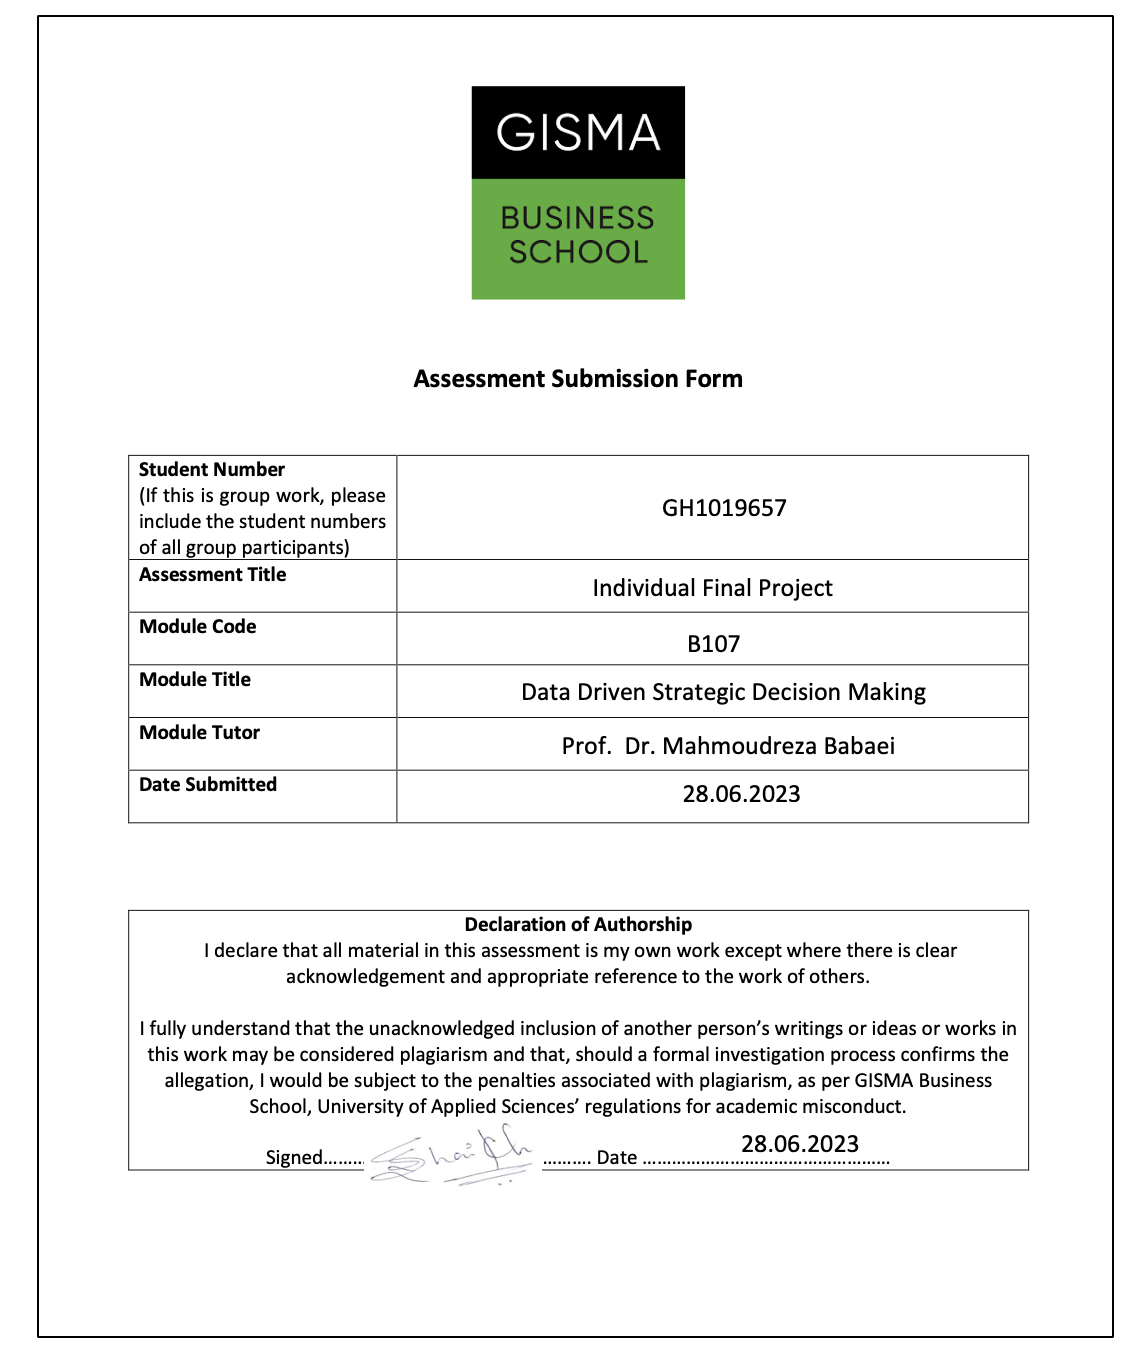%0A" width="800" />

In \[ \]: